In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#number of rows and columns
df.shape

(891, 12)

In [6]:
# get infor of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Handling missing values

In [8]:
# to check number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# drop the cabin column from the dataset 

df = df.drop(columns='Cabin', axis=1)

In [14]:
# replace the missing value in Age column with Mean value 
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [25]:
# replace the missing value with the Mode value for Embarked column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA : Explorary Data Analysis

In [28]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# Find the number of people survived and not survived 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [33]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

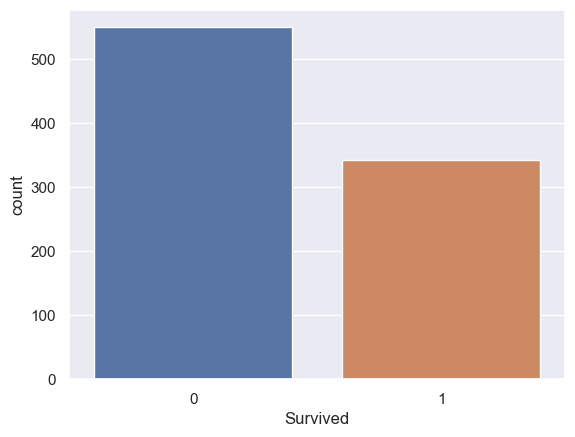

In [54]:
sns.countplot('Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

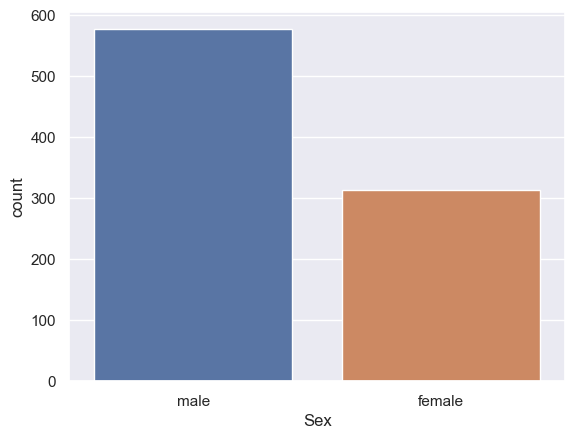

In [55]:
sns.countplot('Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

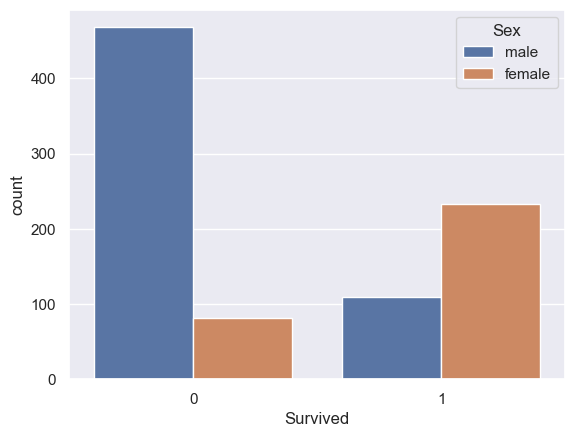

In [56]:
# number of survivors of Gender wise
sns.countplot('Survived', data=df, hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

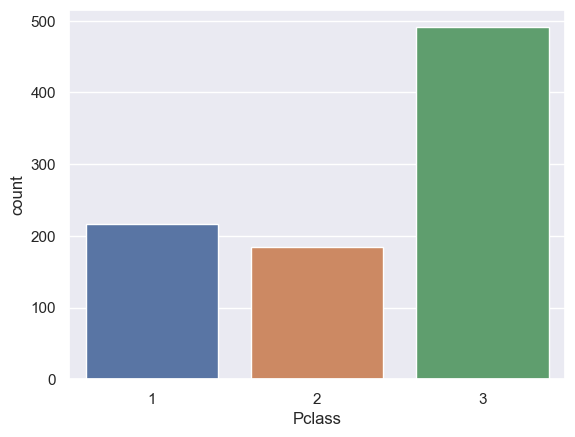

In [60]:
# Count plot for Pclass column
sns.countplot('Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

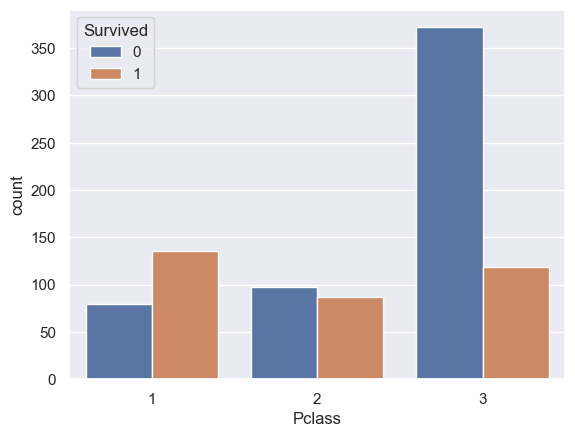

In [61]:
# Count plot for Pclass column
sns.countplot('Pclass', data=df, hue='Survived')

## Encoding Categorical Columns : Sex & Embarked

In [67]:
print(df['Sex'].unique())
print(df['Sex'].value_counts())

['male' 'female']
male      577
female    314
Name: Sex, dtype: int64


In [68]:
print(df['Embarked'].unique())
print(df['Embarked'].value_counts())

['S' 'C' 'Q']
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [70]:
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Seperate Feature Vairbales and Target Variables

In [75]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis=1)
Y = df['Survived']

In [76]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [77]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Splitting Traing and Test data

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state=0)

In [81]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


## Traing the model

In [82]:
#train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

#fir the model
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Model Evaluation 

In [86]:
Y_train_pred = logreg.predict(X_train)

In [88]:
# Accuracy 
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, Y_train_pred)
print('Accuracy of Traing Data: ',train_accuracy)

Accuracy of Traing Data:  0.7991573033707865


In [91]:
Y_test_pred = logreg.predict(X_test)
test_acc = accuracy_score(Y_test, Y_test_pred)
print('Accuracy of Testing Data: ',test_acc)

Accuracy of Testing Data:  0.7988826815642458


[[93 17]
 [19 50]]


<AxesSubplot:>

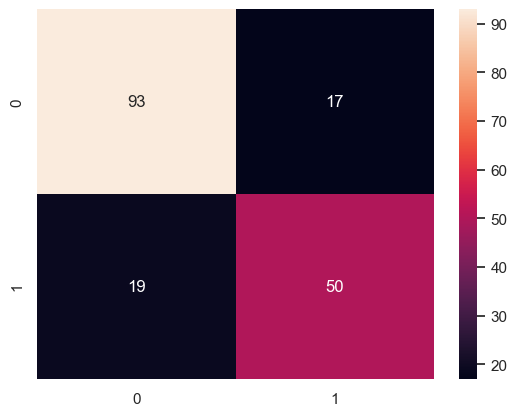

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_pred)
print(cm)
sns.heatmap(cm, annot=True)

[[381  58]
 [ 85 188]]


<AxesSubplot:>

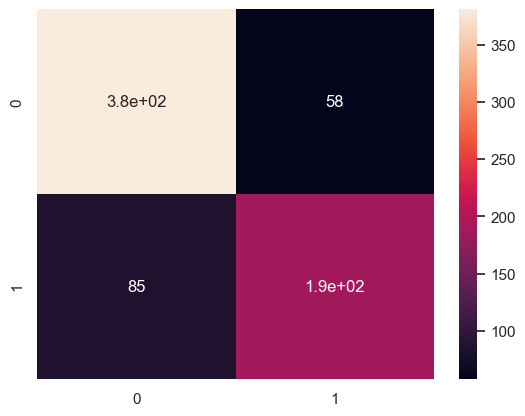

In [100]:
cm = confusion_matrix(Y_train, Y_train_pred)
print(cm)
sns.heatmap(cm, annot=True)